In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


Text(0.5, 1.0, 'Распределение смертности и жесткости воды')

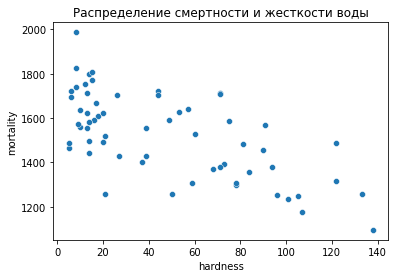

In [ ]:
sns.scatterplot(data=data,x='hardness', y='mortality').set_title('Распределение смертности и жесткости воды')

In [ ]:
#Pearson correlation
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
#Spearman correlation
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Оба коэффициента корреляции показывают значительную отрицательную зависимость переменных

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['hardness']]
y = data['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [ ]:
X_train.shape

(36, 1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
display(model.coef_)
display(model.intercept_)

array([-3.03290421])

1674.316208502996

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1355.8612662 , 1643.98716638, 1631.85554953, 1540.86842316,
       1437.74967994, 1613.65812426, 1270.93994826, 1446.84839257,
       1610.62522004, 1656.11878323, 1495.37485997, 1428.6509673 ,
       1556.03294422, 1631.85554953, 1458.98000942, 1556.03294422,
       1643.98716638, 1628.82264532, 1367.99288305, 1619.72393268,
       1525.7039021 , 1610.62522004, 1468.07872206, 1501.4406684 ,
       1255.77542719])

In [ ]:
# сравниваем наш прогноз с фактом
res_data = X_test.copy()

res_data['y_pred'] = y_pred
res_data['y_test'] = y_test
res_data

,hardness,y_pred,y_test
0,105,1355.861266,1247
5,10,1643.987166,1558
46,14,1631.855550,1495
31,44,1540.868423,1702
13,78,1437.749680,1307
55,20,1613.658124,1625
34,133,1270.939948,1259
49,75,1446.848393,1587
12,21,1610.625220,1519
40,6,1656.118783,1696


In [ ]:
model.score(X_test, y_test) #коэффициент детерминации

0.46148826775530527



    Качество модели плохое. Частично это связано с маленьким количеством данных в выборке.
    По имеющимся данным нельзя утверждать, что существует взаимосвязь между смертностью и жесткостью воды.



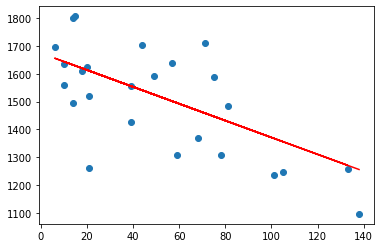

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

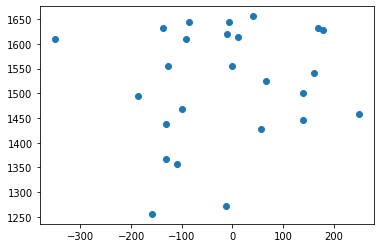

In [ ]:
#График остатков
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)


Южные города

Text(0.5, 1.0, 'Распределение смертности и жесткости воды на Юге')

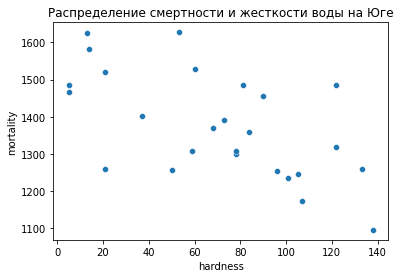

In [ ]:
#Распределение смертности и жесткости воды на Юге
sns.scatterplot(data=data[data['location'] == 'South'],x='hardness', y='mortality').set_title('Распределение смертности и жесткости воды на Юге')

In [ ]:
#Pearson correlation
South_data = data[data['location'] == 'South']
Pearson_south = South_data[['mortality', 'hardness']].corr()
#Spearman correlation
Spearman_south = South_data[['mortality', 'hardness']].corr(method='spearman')
print(f'К-т Пирсона {Pearson_south}\n')
print(f'К-т Спирмена {Spearman_south}')

К-т Пирсона            mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000

К-т Спирмена            mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000




Коэффициенты корреляции Пирсона и Спирмена для южных городов свидетельствуют о наличии значительной отрицательной зависимости, но они меньше, чем для данных на тотале



In [ ]:
X_S = South_data[['hardness']]
y_S = South_data['mortality']

In [ ]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S, y_S, test_size=0.40, random_state=42)

In [ ]:
model_S = LinearRegression()
model_S.fit(X_S_train, y_S_train)

LinearRegression()

In [ ]:
display(model_S.coef_)
display(model_S.intercept_)

array([-3.42015857])

1628.9538707079364

In [ ]:
y_S_pred = model_S.predict(X_S_test)
y_S_pred

array([1211.69452552, 1611.85307787, 1269.83722116, 1211.69452552,
       1502.40800372, 1557.1305408 , 1427.16451525, 1611.85307787,
       1447.68546665, 1557.1305408 , 1362.18150247])

In [ ]:
# сравниваем наш прогноз с фактом
res_data_S = X_S_test.copy()

res_data_S['y_S_pred'] = y_S_pred
res_data_S['y_S_test'] = y_S_test
res_data_S

,hardness,y_S_pred,y_S_test
18,122,1211.694526,1318
38,5,1611.853078,1486
0,105,1269.837221,1247
58,122,1211.694526,1486
27,37,1502.408004,1402
19,21,1557.130541,1260
33,59,1427.164515,1309
2,5,1611.853078,1466
57,53,1447.685467,1627
12,21,1557.130541,1519


In [ ]:
model_S.score(X_S_test, y_S_test) #коэффициент детерминации

-0.7912771733269186

Коэффициент детерминации принимает отрицаетльное значение, что говорит о том, что получившаяся модель линейной модели неверно описывает данные.

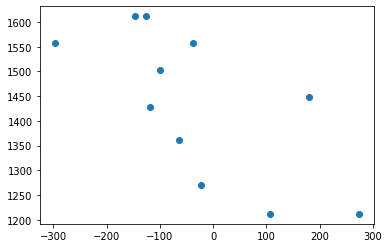

In [ ]:
#График остатков
residuals_S = y_S_test-y_S_pred
plt.scatter(residuals_S,y_S_pred)

Северные города

Text(0.5, 1.0, 'Распределение смертности и жесткости воды на Севере')

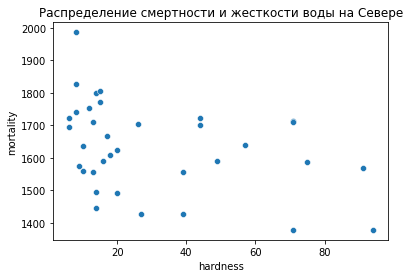

In [ ]:
#Распределение смертности и жесткости воды на Севере
sns.scatterplot(data=data[data['location'] == 'North'],x='hardness', y='mortality').set_title('Распределение смертности и жесткости воды на Севере')

In [ ]:
#Pearson correlation
North_data = data[data['location'] == 'North']
Pearson_south = North_data[['mortality', 'hardness']].corr()
#Spearman correlation
Spearman_south = North_data[['mortality', 'hardness']].corr(method='spearman')
print(f'К-т Пирсона {Pearson_south}\n')
print(f'К-т Спирмена {Spearman_south}')

К-т Пирсона            mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000

К-т Спирмена            mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000




    Коэффициенты корреляции Пирсона и Спирмена для северных городов свидетельствуют о наличии незначительной отрицательной зависимости



In [ ]:
X_N = North_data[['hardness']]
y_N = North_data['mortality']

In [ ]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y_N, test_size=0.40, random_state=42)

In [ ]:
model_N = LinearRegression()
model_N.fit(X_N_train, y_N_train)

LinearRegression()

In [ ]:
display(model_N.coef_)
display(model_N.intercept_)

array([-1.8098157])

1675.6520506990523

In [ ]:
y_N_pred = model_N.predict(X_N_test)
y_N_pred

array([1661.1735251 , 1659.3637094 , 1650.31463091, 1664.7931565 ,
       1646.69499951, 1547.15513604, 1596.02015992, 1661.1735251 ,
       1605.06923842, 1648.50481521, 1605.06923842, 1639.45573671,
       1644.88518381, 1648.50481521])

In [ ]:
# сравниваем наш прогноз с фактом
res_data_N = X_N_test.copy()

res_data_N['y_N_pred'] = y_N_pred
res_data_N['y_N_test'] = y_N_test
res_data_N

,hardness,y_N_pred,y_N_test
45,8,1661.173525,1987
23,9,1659.363709,1574
43,14,1650.314631,1444
36,6,1664.793157,1724
26,16,1646.695000,1591
50,71,1547.155136,1713
31,44,1596.020160,1702
22,8,1661.173525,1742
16,39,1605.069238,1555
28,15,1648.504815,1772


In [ ]:
model_N.score(X_N_test, y_N_test) #коэффициент детерминации

-0.0072864520339881444



    Коэффициент детерминации близок к нулю, что говорит о том, что модель очень плохая и средние прогнозируют лучше.
    Линейнай модель регрессии не способна достоверно описать данные



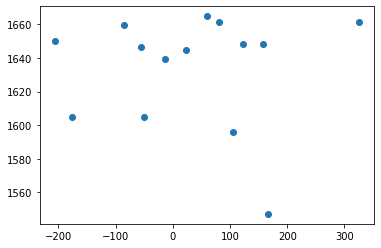

In [ ]:
#График остатков
residuals_N = y_N_test-y_N_pred
plt.scatter(residuals_N,y_N_pred)


Для построения адекватной модели при разделении на южные и северные города становится слишком мало данных и модели получаются неадекватными. В связи с чем нельзя утверждать, что существует взаимосвязь между смертностью и жесткостью воды.